# Assignment

-  DT를 학습시켜 DT graph를 시각화하고 test set에 대한 정확도를 출력하시오
- 그리고 가장 중요한 feature를 2가지를 선택해서 다시 DT classifier를 학습시키시오.
-  이후  decision boundary를 시각화 하시오.


In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [71]:
wine = load_wine(as_frame=True)

In [72]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
wine = load_wine(as_frame=True)
df = wine.data
df['label'] = wine.target

In [73]:
X = df[['alcohol', 'malic_acid']]
y = wine.target

In [74]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [75]:
tree_clf2 = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=11)
tree_clf2.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=11)

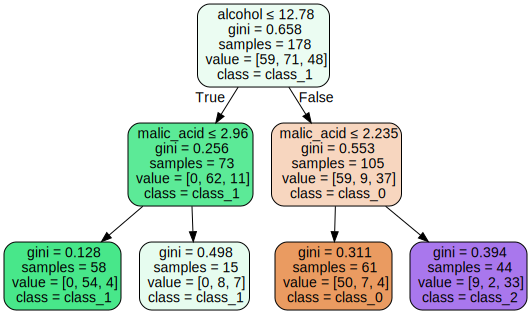

In [76]:
from sklearn.tree import export_graphviz
from graphviz import Source

export_data = export_graphviz(
    tree_clf2,
    out_file=None,
    feature_names=wine.feature_names[0:2],
    class_names=wine.target_names,
    filled=True,
    rounded=True,
    special_characters=True
)
graph = Source(export_data)
graph

In [77]:
y_pred = tree_clf2.predict(X)
accuracy_score = accuracy_score(y, y_pred)
print(f"테스트 세트 정확도: {accuracy_score:.2f}")

테스트 세트 정확도: 0.81


In [78]:
tree_clf2.feature_importances_

array([0.61301976, 0.38698024])

# graph(tree) Viz

In [83]:
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size= 0.2, random_state = 11)

In [84]:
import numpy as np
import matplotlib.pyplot as plt

In [85]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=2,random_state=11)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=11)

In [86]:
from sklearn.tree import export_graphviz
from graphviz import Source

export_data = export_graphviz(
    tree_clf,
    out_file=None,
    feature_names=wine.feature_names,
    class_names=wine.target_names,
    filled=True,
    rounded=True,
    special_characters=True
)

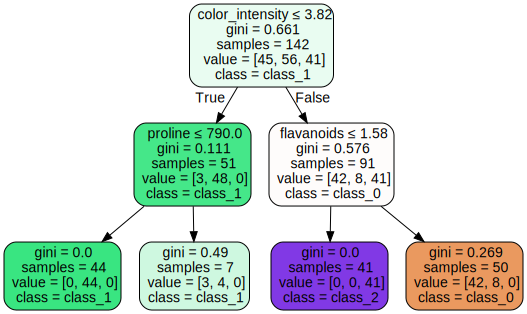

In [87]:
graph = Source(export_data)
graph

#정확도 출력 (Accuracy)

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
y_pred = tree_clf.predict(X_test)
accuracy_score = accuracy_score(y_test, y_pred)
print(f"테스트 세트 정확도: {accuracy_score:.2f}")

테스트 세트 정확도: 0.89


# 가장 중요도가 높은 2가지 feature를 고르시오.
 - 각 feature들의 중요도를 시각화하여 근거를 제시하시오.

In [89]:
tree_clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.5068279 , 0.        , 0.        , 0.46434123,
       0.        , 0.        , 0.02883087])

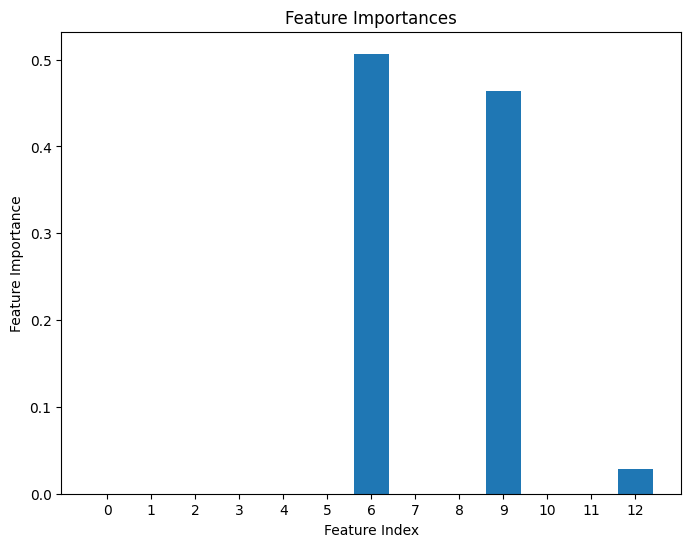

In [91]:
plt.figure(figsize=(8, 6))
plt.bar(range(len(tree_clf.feature_importances_)), tree_clf.feature_importances_)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Feature Importances")
plt.xticks(range(len(tree_clf.feature_importances_)), range(len(tree_clf.feature_importances_)))
plt.show()

In [92]:
feature_importances_ = tree_clf.feature_importances_
high_2_features = np.argsort(feature_importances_)[-2:]
print(high_2_features)

[9 6]


In [94]:
important_feature_names = [wine.feature_names[i] for i in high_2_features]

important_feature_names

['color_intensity', 'flavanoids']

# 위에서 고른 2가지 feature만을 가지고 DT를 다시 학습하시오.

 - 학습된 DT를 가지고 test set에 대한 정확도를 출력하시오.

In [95]:
X_train_selected = X_train[:, high_2_features]
X_test_selected = X_test[:, high_2_features]

dt_model_selected = DecisionTreeClassifier(criterion='gini', max_depth=2,random_state=11)
dt_model_selected.fit(X_train_selected, y_train)

y_pred_selected = dt_model_selected.predict(X_test_selected)

In [96]:
# 상위 2개의 특성을 사용하여 Decision Tree 모델 생성 및 학습
dt_model_selected = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=11)
dt_model_selected.fit(X_train_selected, y_train)

# 테스트 세트에 대한 예측
y_pred_selected = dt_model_selected.predict(X_test_selected)


In [97]:
export_data = export_graphviz(
    dt_model_selected,  # 새로운 Decision Tree 모델
    out_file=None,
    feature_names=important_feature_names,  # 상위 2개 특성의 이름
    class_names=wine.target_names,  # 클래스 이름
    filled=True,
    rounded=True,
    special_characters=True
)

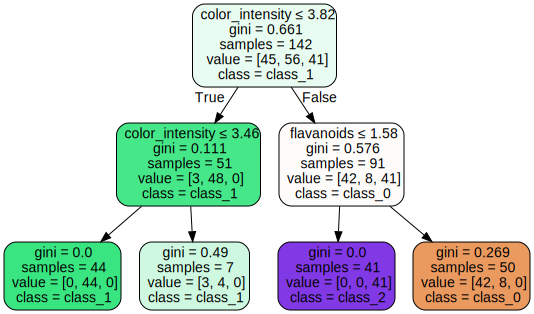

In [98]:
graph = Source(export_data)
graph

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 정확도 계산 및 출력
accuracy = accuracy_score(y_test, y_pred_selected)
print(f"테스트 세트 정확도: {accuracy:.2f}")

테스트 세트 정확도: 0.89


# 해당 classifier의 Decision Boundary를 그리시오

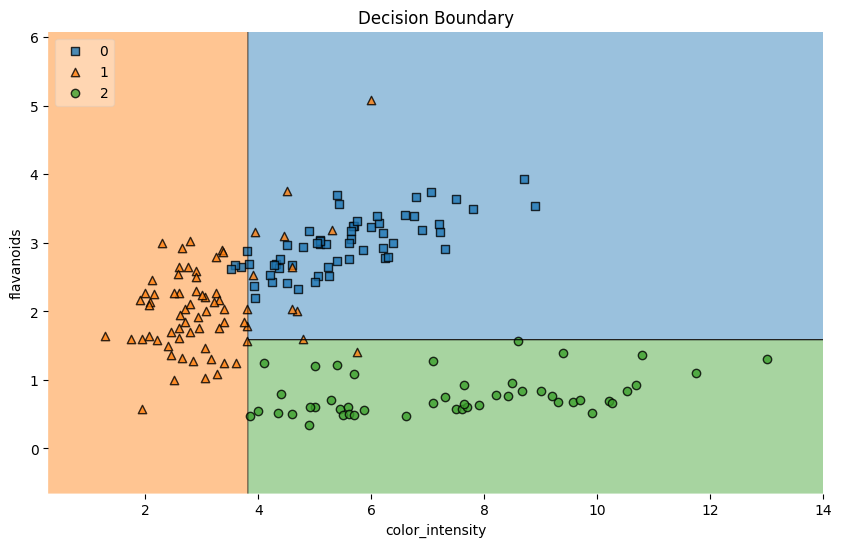

In [101]:
from mlxtend.plotting import plot_decision_regions

# 훈련 데이터와 라벨을 합침
X_combined = np.vstack((X_train_selected, X_test_selected))
y_combined = np.hstack((y_train, y_test))

# Decision Boundary 시각화
plt.figure(figsize=(10, 6))
plot_decision_regions(X_combined, y_combined, clf=dt_model_selected, legend=2)
plt.xlabel(important_feature_names[0])
plt.ylabel(important_feature_names[1])
plt.title("Decision Boundary")
plt.show()
